# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [35]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [5]:
# Carregando a base de dados
df = pd.read_csv('CARRO_CLIENTES.csv', encoding='utf-8')

In [6]:
# Verificar as primeiras linhas do dataframe 
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### Análise

Ao observar o DataFrame, notamos que ele possui 5 variáveis, sendo 'Purchased' a nossa variável alvo. Decidimos remover a coluna 'User ID' desde o início, pois ela não agrega valor ao nosso modelo preditivo

In [8]:
# Verificando as informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


### Análise 

A análise dos tipos de dados revela que todas as variáveis estão corretamente formatadas, com exceção de 'Gender' (Gênero), que é do tipo 'object' (categórica). Para que esta variável possa ser utilizada de forma eficaz na modelagem preditiva e garantir uma análise precisa, é imprescindível convertê-la para um formato numérico antes de prosseguir.


In [10]:
# Verificar os dados faltantes em meu DataFrame 
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### Análise

A verificação de dados faltantes revelou que todo o DataFrame está completamente preenchido, o que simplifica significativamente as etapas de pré-processamento e análise, não exigindo tratamentos para valores ausentes

In [12]:
# Excluindo a nossa variavel ID 
df = df.drop('User ID', axis=1)

### Análise 

Conforme observado, a variável 'User ID' não possui relevância preditiva para o nosso modelo. Por essa razão, ela foi removida do DataFrame, otimizando o conjunto de dados e simplificando o código.

In [14]:
# Verificando a remoção da coluna 
df.columns 

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [119]:
# Visualizando os valores descritivos do DataFrame 
df.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [16]:
# Instancionando o Label Encoder 
le = LabelEncoder()

# Aplicando o label Encoder na coluna Gender 
df['Gender'] = le.fit_transform(df['Gender'])

df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


### Análise

Dando continuidade à preparação dos dados, a única coluna categórica ('Gender') será transformada em um formato numérico. Essa conversão é essencial para que a variável possa ser devidamente utilizada em nosso modelo de Machine Learning.

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

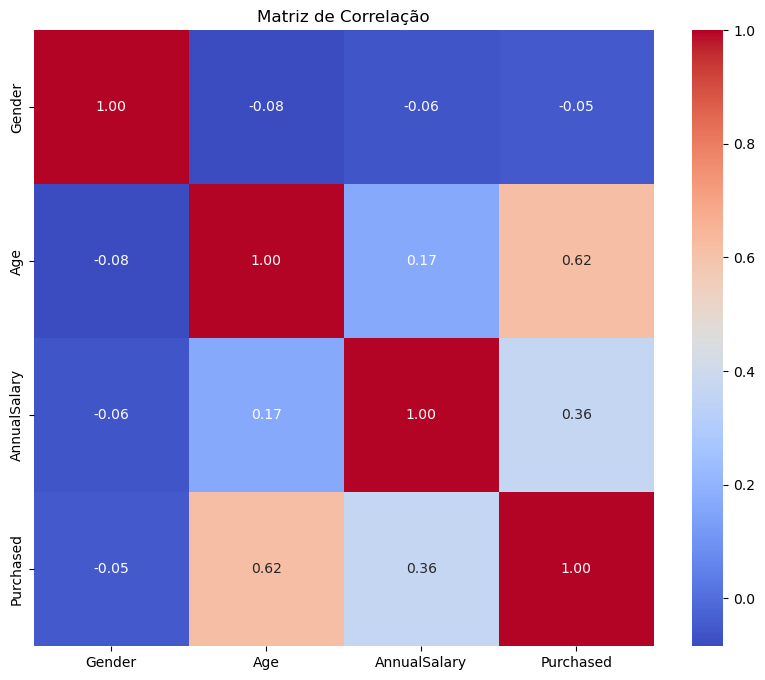

In [19]:
# Plotando a matriz de correlação 
corr = df.corr()

# Criando o gráfico 
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Análise 

A análise da matriz de correlação revela insights importantes sobre a relação das variáveis com a propensão de compra. Observa-se que a variável 'AnnualSalary' (Salário Anual) apresenta uma correlação de 0.36 com a nossa variável alvo 'Purchased' (Compra), o que sugere uma correlação positiva moderada.


# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [22]:
# Separando a base de treino e teste 
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Dividindo em 80% treino e 20% teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

### Análise 

Nesta etapa do código, separamos o DataFrame em dois conjuntos: X (variáveis preditoras) e y (variável alvo). X contém todas as colunas, exceto 'Purchased', enquanto y é exclusivamente a nossa variável alvo, 'Purchased' (compra)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.
em seguida sepaamos em 20% da nossa base como teste 

In [25]:
# Treinando o modelo de Xgboost com mais hiperparâmetros 
model =xgb.XGBClassifier(
    max_depth=6,           # Profundidade máxima da árvores
    learning_rate=0.1,     # Taxa de aprendizado
    n_estimators=100,      # Número de árvore
    subsample=0.8,         # Usar 80% das amostra para cada árvore
    colsample_bytree=0.5,  # Usar 50% das features para cada árvore
    random_state=42,
    eval_metric='logloss'  # Métrica para monitoramento

)       

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [27]:
# Realizando as previsões para a base de teste 
y_pred = model.predict(X_test)

In [28]:
# Obtendo as probabilidade das previsões
y_probs = model.predict_proba(X_test)
y_probs

array([[0.8547237 , 0.14527631],
       [0.01702034, 0.98297966],
       [0.9980346 , 0.00196543],
       [0.6229386 , 0.37706143],
       [0.1016584 , 0.8983416 ],
       [0.2165302 , 0.7834698 ],
       [0.07411557, 0.9258844 ],
       [0.99016696, 0.00983305],
       [0.9789823 , 0.02101766],
       [0.83207434, 0.16792566],
       [0.9587027 , 0.04129731],
       [0.99500424, 0.00499576],
       [0.8732541 , 0.1267459 ],
       [0.98729193, 0.01270809],
       [0.12415618, 0.8758438 ],
       [0.25824136, 0.74175864],
       [0.69270146, 0.30729857],
       [0.03203237, 0.9679676 ],
       [0.03432482, 0.9656752 ],
       [0.96898615, 0.03101383],
       [0.7988877 , 0.2011123 ],
       [0.07319063, 0.9268094 ],
       [0.15685487, 0.84314513],
       [0.99878573, 0.00121428],
       [0.0138281 , 0.9861719 ],
       [0.915647  , 0.08435301],
       [0.17599666, 0.82400334],
       [0.18337595, 0.81662405],
       [0.8531128 , 0.14688721],
       [0.60846853, 0.39153144],
       [0.

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [71]:
# Transformando as probabilidade em previsões binárias com limiar de 0.5
y_probs = model.predict_proba(X_test)[:,1] # Pegar apenas a coluna classe 1 
y_pred_binario = (y_probs >= 0.5).astype(int) # Se for >= 0.5 vira 1, senão 0

In [78]:
# Avaliando o modelo 

# Acurácia
print("Acurácia:", accuracy_score(y_test, y_pred_binario))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_binario))

# Relatório completo 
print("relat´rio de Classificação:")
print(classification_report(y_test, y_pred_binario))

Acurácia: 0.89
Matriz de Confusão:
[[106   6]
 [ 16  72]]
relat´rio de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       112
           1       0.92      0.82      0.87        88

    accuracy                           0.89       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.89      0.89      0.89       200



# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

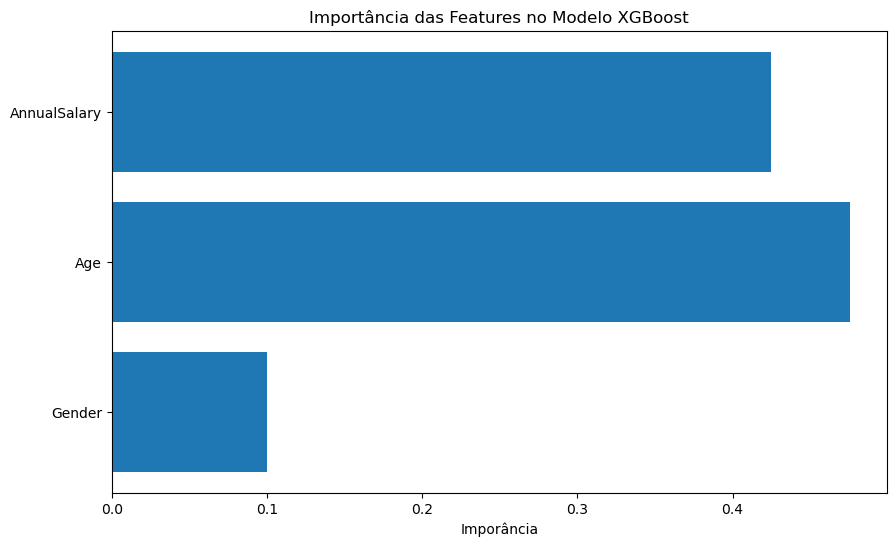

In [96]:
# Obtendo a importância das features 
top_features = model.feature_importances_
features = X.columns

# Organizando em um gráfico
plt.figure(figsize=(10, 6))
plt.barh(features, top_features)
plt.xlabel('Imporância')
plt.title('Importância das Features no Modelo XGBoost')
plt.show()

In [111]:
# Criando o DataFrame com a importância das features
top_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': top_features
})

# Ordenando da mais importante para a menos importante
top_features_df = top_features_df.sort_values(by='Importância', ascending=False)

# Exibindo o DataFrame 
top_features_df

,Feature,Importância
1,Age,0.475660
2,AnnualSalary,0.424549
0,Gender,0.099790


### Conclusão e Insights do Modelo XGBoost
O modelo XGBoost demonstrou um excelente desempenho na previsão da propensão de compra de carros, atingindo uma acurácia de 89%. Este resultado, juntamente com as métricas de precisão (0.87 para não-compra, 0.92 para compra) e recall (0.95 para não-compra, 0.82 para compra), valida a capacidade do modelo em identificar corretamente clientes que provavelmente comprarão um carro e aqueles que não comprarão.

A matriz de confusão revela que o modelo conseguiu classificar a grande maioria dos clientes corretamente, com um número relativamente baixo de falsos positivos e falsos negativos, o que é crucial para campanhas de marketing direcionadas.